# Mitigated

### Build Quantum Circuit

In [1]:
from qiskit import QuantumCircuit
from numpy import pi

In [2]:
class adv_QuantumCircuit(QuantumCircuit):
    def adv_cx(self, q1, q2):
        import random
        case = random.randrange(1, 17)
        if case==1:
            self.cx(q1, q2)
        elif case==2:
            self.x(q2)
            self.cx(q1, q2)
            self.x(q2)
        elif case==3:
            self.y(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.y(q2)
        elif case==4:
            self.z(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.z(q2)
        elif case==5:
            self.y(q1)
            self.cx(q1, q2)
            self.y(q1)
            self.x(q2)
        elif case==6:
            self.y(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.y(q1)
        elif case==7:
            self.y(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.x(q1)
            self.z(q2)
        elif case==8:
            self.y(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.x(q1)
            self.y(q2)
        elif case==9:
            self.x(q1)
            self.cx(q1, q2)
            self.x(q1)
            self.x(q2)
        elif case==10:
            self.x(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.x(q1)
        elif case==11:
            self.x(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.y(q1)
            self.z(q2)
        elif case==12:
            self.x(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.y(q1)
            self.y(q2)
        elif case==13:
            self.z(q1)
            self.cx(q1, q2)
            self.z(q1)
        elif case==14:
            self.z(q1)
            self.x(q2)
            self.cx(q1, q2)
            self.z(q1)
            self.x(q2)
        elif case==15:
            self.z(q1)
            self.y(q2)
            self.cx(q1, q2)
            self.y(q2)
        elif case==16:
            self.z(q1)
            self.z(q2)
            self.cx(q1, q2)
            self.z(q2)

In [3]:
def make_circuit(i):
    circuit = adv_QuantumCircuit(6, 6)
    import random
    rot0 = random.random()*2*pi
    rot1 = random.random()*2*pi
    rot2 = random.random()*2*pi
    rot3 = random.random()*2*pi
    rot4 = random.random()*2*pi
    rot5 = random.random()*2*pi
    
    circuit.rx(rot0, 0)
    circuit.rx(rot1, 1)
    circuit.rx(rot2, 2)
    circuit.rx(rot3, 3)
    circuit.rx(rot4, 4)
    circuit.rx(rot5, 5)

    circuit.barrier()

    for k in range(i):

        circuit.adv_cx(1, 2)
        circuit.adv_cx(3, 4)

        circuit.adv_cx(1, 2)
        circuit.adv_cx(3, 4)

        circuit.adv_cx(0, 1)
        circuit.adv_cx(2, 3)
        circuit.adv_cx(4, 5)
        
        circuit.adv_cx(0, 1)
        circuit.adv_cx(2, 3)
        circuit.adv_cx(4, 5)

        circuit.adv_cx(1, 2)
        circuit.adv_cx(3, 4)

        circuit.adv_cx(1, 2)
        circuit.adv_cx(3, 4)

        circuit.barrier()


    circuit.rx(-rot0,0)
    circuit.rx(-rot1, 1)
    circuit.rx(-rot2, 2)
    circuit.rx(-rot3, 3)
    circuit.rx(-rot4, 4)
    circuit.rx(-rot5, 5)
    
    circuit.measure(5, 5)
    
    return circuit

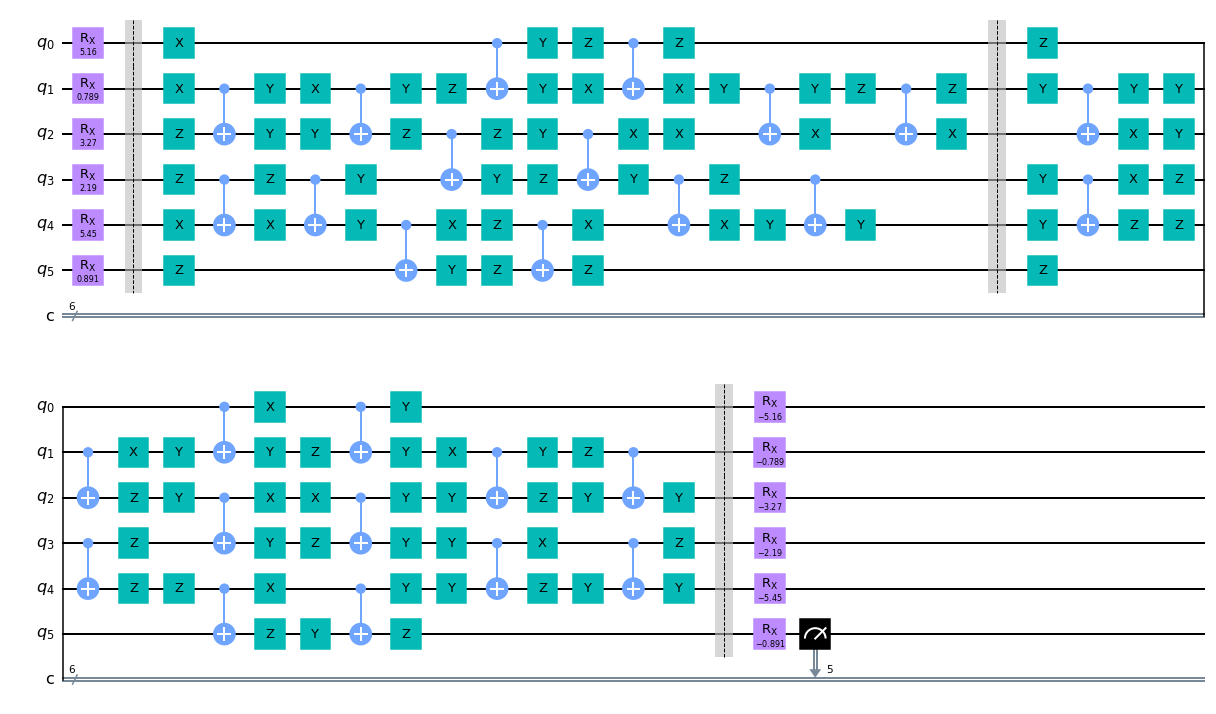

In [4]:
# check circuit
circ = make_circuit(2)
circ.draw('mpl')

### Execute Quantum Circuit

In [5]:
from qiskit.test.mock import FakeMontreal
from qiskit.providers.aer import AerSimulator
from qiskit import transpile
from tqdm import notebook

device_backend = FakeMontreal()
sim_mont = AerSimulator.from_backend(device_backend)

In [6]:
x_list = []
y_list = []

for num in notebook.tqdm(range(448)):
    x = []
    y = []
    for i in range(16):
        circuit = make_circuit(i)
        tcirc = transpile(circuit, sim_mont)

        # Execute noisy simulation and get counts
        result_noise = sim_mont.run(tcirc).result()
        counts_noise = result_noise.get_counts()
        
        prob_000000 = counts_noise['000000']/1024
        try:
            prob_100000 = counts_noise['100000']/1024
        except:
            prob_100000 = 0

        prob_tot = prob_000000 - prob_100000

        x.append(i*0.2)
        y.append(prob_tot)
    x_list.append(x)
    y_list.append(y)

  0%|          | 0/448 [00:00<?, ?it/s]

### Result

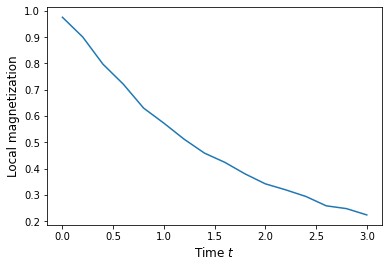

In [7]:
from matplotlib import pyplot as plt
import numpy as np

x = x_list[0]
s = np.mean(y_list, axis=0)
plt.plot(x, s)
plt.xlabel(r'Time $t$', fontsize="12")
plt.ylabel(r'Local magnetization', fontsize="12")

plt.show()

In [8]:
y = np.load("./ori_mean.npy")

In [9]:
y_mit = y/s

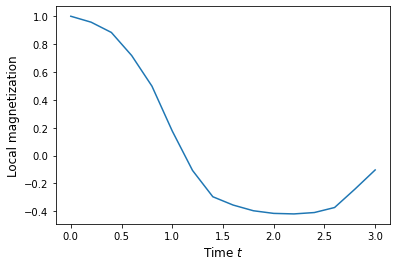

In [10]:
from matplotlib import pyplot as plt

x=x_list[0]
plt.plot(x, y_mit)
plt.xlabel(r'Time $t$', fontsize="12")
plt.ylabel(r'Local magnetization', fontsize="12")

plt.show()

In [11]:
# save
np.save('./mit', y_mit)